In [13]:
pip install pandas


/bin/bash: line 1: /home/michele/Desktop/Tirocinio_giusto/Tirocinio/.venv/bin/pip: cannot execute: required file not found
/bin/bash: line 1: /home/michele/Desktop/Tirocinio_giusto/Tirocinio/.venv/bin/pip: cannot execute: required file not found


In [17]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 506.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 681.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 807.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 770.6 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:

csv_file_path = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati.csv'
csv_file_path1 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_ottimizzo.csv'
df = pd.read_csv(csv_file_path)
df1 = pd.read_csv(csv_file_path1)

print(df)
print(df1)

      File  Iteration  Max_columns  Duration_w_all_Columns  \
0        1          0           11               11.525384   
1        1          1           11                4.971245   
2        1          2           11               11.953039   
3        1          3           11               67.883316   
4        1          4           11               24.654693   
...    ...        ...          ...                     ...   
3987     2        995           12               19.798406   
3988     2        996           12               20.281432   
3989     2        997           12               19.470046   
3990     2        998           12               18.760373   
3991     2        999           12               19.720940   

      Duration_w_max_columns  Num_op_w_all_columns  Num_op_w_max_columns  
0                   2.056781                 15876                  1358  
1                   2.517609                 15876                  1380  
2                   4.264375  

In [25]:
df_appended = pd.concat([df, df1], ignore_index=True)
print(df_appended)

      File  Iteration  Max_columns  Duration_w_all_Columns  \
0        1          0           11               11.525384   
1        1          1           11                4.971245   
2        1          2           11               11.953039   
3        1          3           11               67.883316   
4        1          4           11               24.654693   
...    ...        ...          ...                     ...   
5987     3        995           12                0.869382   
5988     3        996           12                0.175241   
5989     3        997           12                0.174040   
5990     3        998           12                0.168446   
5991     3        999           12                0.194894   

      Duration_w_max_columns  Num_op_w_all_columns  Num_op_w_max_columns  
0                   2.056781                 15876                  1358  
1                   2.517609                 15876                  1380  
2                   4.264375  

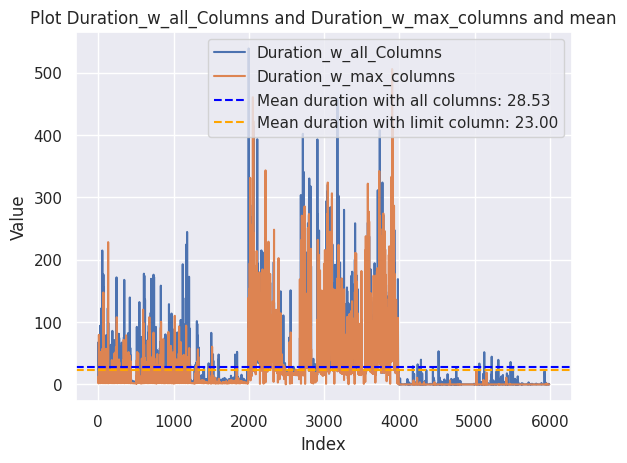

In [39]:
#lascia il tempo che trova
mean_w_all_cols = df_appended['Duration_w_all_Columns'].mean()
mean_w_max_cols = df_appended['Duration_w_max_columns'].mean()

plt.plot(df_appended.index, df_appended['Duration_w_all_Columns'], label='Duration_w_all_Columns')
plt.plot(df_appended.index, df_appended['Duration_w_max_columns'], label='Duration_w_max_columns')

plt.axhline(y=mean_w_all_cols, color='blue', linestyle='--', label=f'Mean duration with all columns: {mean_w_all_cols:.2f}')
plt.axhline(y=mean_w_max_cols, color='orange', linestyle='--', label=f'Mean duration with limit column: {mean_w_max_cols:.2f}')

plt.title('Plot Duration_w_all_Columns and Duration_w_max_columns and mean')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')

plt.show()

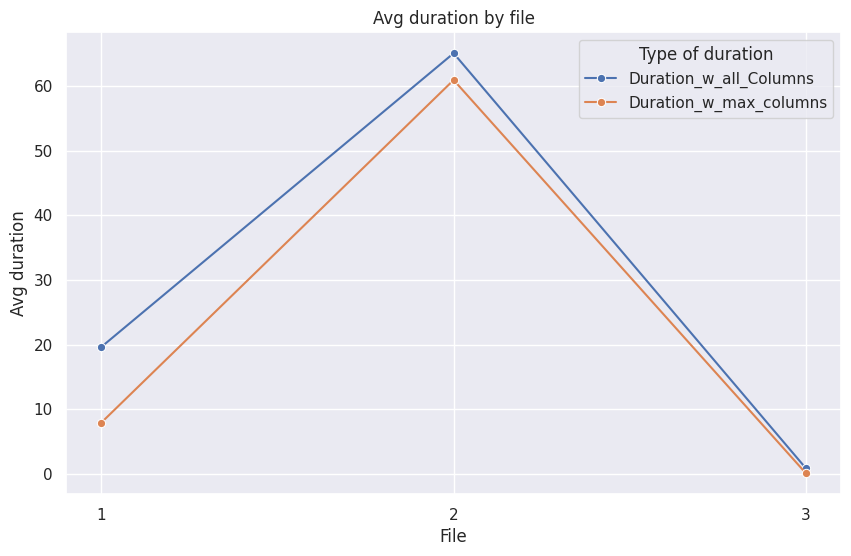

In [31]:
grouped_means = df_appended.groupby('File').agg({
    'Duration_w_all_Columns': 'mean',
    'Duration_w_max_columns': 'mean'
}).reset_index()
import seaborn as sns

sns.set(style='darkgrid')

grouped_means_melted = grouped_means.melt(id_vars='File', value_vars=['Duration_w_all_Columns', 'Duration_w_max_columns'], 
                                           var_name='Durata_Type', value_name='Avg')

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_means_melted, x='File', y='Avg', hue='Durata_Type', marker='o')

plt.title('Avg duration by file')
plt.xlabel('File')
plt.ylabel('Avg duration')
plt.xticks(grouped_means['File'])  # Imposta le etichette dell'asse x

plt.legend(title='Type of duration')
plt.show()

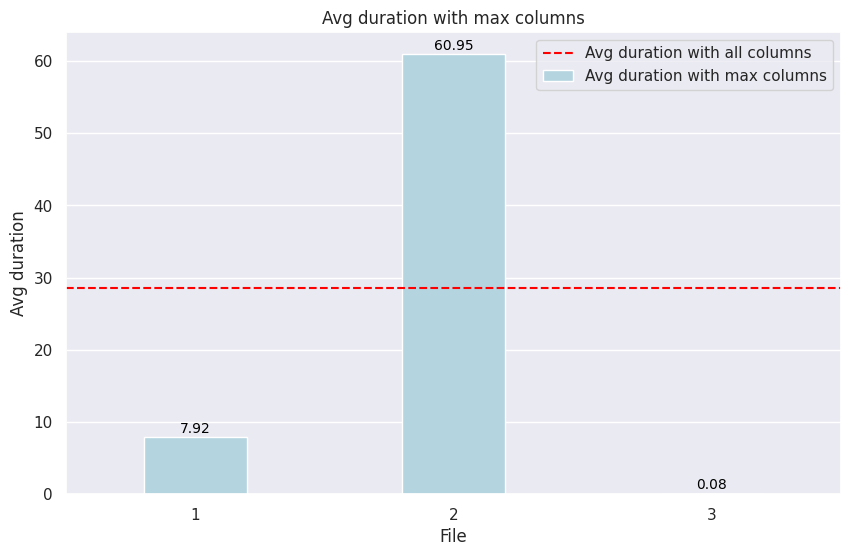

In [37]:
mean_w_all_cols = df_appended['Duration_w_all_Columns'].mean()

grouped_means = df_appended.groupby('File').agg({
    'Duration_w_max_columns': 'mean'
}).reset_index()

grouped_means['Mean_Global'] = mean_w_all_cols

plt.figure(figsize=(10, 6))
plt.axhline(y=mean_w_all_cols, color='red', linestyle='--', label='Avg duration with all columns')
barplot = sns.barplot(data=grouped_means, x='File', y='Duration_w_max_columns', color='lightblue', width=0.4, label='Avg duration with max columns')

plt.title('Avg duration with max columns')
plt.xlabel('File')
plt.ylabel('Avg duration')
plt.xticks(ticks=range(len(grouped_means)), labels=grouped_means['File'], rotation=0)  # Modifica rotation se necessarioplt.legend()
plt.legend(loc='upper right')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 1), 
                     textcoords='offset points')

plt.show()